<a href="https://colab.research.google.com/github/GouravSolanki-Dev/Apps-Analysis/blob/main/Linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [26]:
import pandas as pd

In [27]:
from sklearn.datasets import  fetch_california_housing

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [30]:
dataset=pd.DataFrame(fetch_california_housing().data)

In [31]:
dataset.columns=fetch_california_housing().feature_names

In [32]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
## Independent feature and Dependent Feature
X=dataset
y=fetch_california_housing().target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [35]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


In [36]:
## Standardiing the data set.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [37]:
x_train=sc.fit_transform(x_train)

In [38]:
x_test=sc.transform(x_test)

In [39]:
## doing the reverse transfor using inverse transform
sc.inverse_transform(x_train)

array([[   1.975     ,   52.        ,    2.8       , ...,    4.825     ,
          36.73      , -119.79      ],
       [   2.2604    ,   43.        ,    3.67148014, ...,    3.01805054,
          37.77      , -122.21      ],
       [   6.299     ,   17.        ,    6.47802198, ...,    3.81043956,
          33.87      , -118.04      ],
       ...,
       [   3.1977    ,   31.        ,    3.64122137, ...,    1.7913486 ,
          36.58      , -121.9       ],
       [   5.6315    ,   34.        ,    4.54059829, ...,    2.24786325,
          33.62      , -117.93      ],
       [   1.3882    ,   15.        ,    3.9295302 , ...,    3.43624161,
          32.8       , -115.56      ]])

In [40]:
from sklearn.linear_model import LinearRegression
##cross alidation
from sklearn.model_selection import cross_val_score

In [41]:
regression=LinearRegression()
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [42]:
np.mean(mse)

-0.5230719414098426

In [43]:
##predition
regression.fit(x_train,y_train)

LinearRegression()

In [44]:
reg_pred=regression.predict(x_test)
reg_pred


array([2.2702672 , 2.79059912, 1.90984782, ..., 3.56895295, 0.98163812,
       2.72552317])

<ipython-input-45-135187f8a76e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-reg_pred)


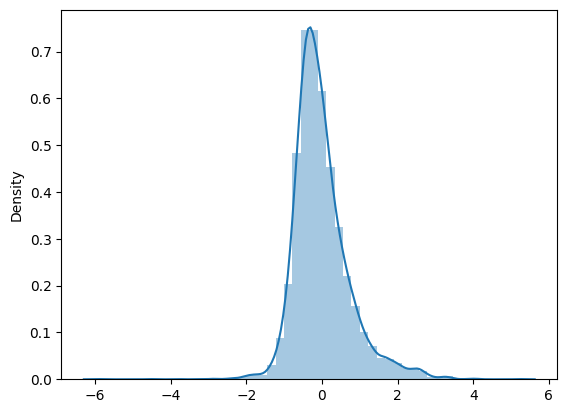

In [45]:
import seaborn as sns
sns.distplot(y_test-reg_pred)
plt.show()

In [46]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.5926087785518777

# New Section